In [1]:
from helpers import *

# See how gradient spilling would look like for Li:

In [30]:
initial_power = 291.5 * si.uW
initial_grad = 21 *si.G/si.cm

#parameters for lithium setup
wvl = 1064 * si.nm
omega_l = 2 * np.pi * const.c / wvl
omega_0 = 2 * np.pi * const.c / (671 * si.nm)
gamma = 2 * np.pi * 5.8724 * const.mega

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z=initial_grad,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,

    wvl = 1064 * si.nm,
    omega_0 = 2 * np.pi * const.c / (671 * si.nm),
    a = (3 * sp.pi * const.c**2) / (2 * omega_0**3)* (gamma / (omega_0 - omega_l) + gamma / (omega_0 + omega_l)),
    m = 6.0151228 * const.value("atomic mass constant"),
    mu_b = const.value("Bohr magneton"),
)
zr = float(trap.subs(trap.get_tweezer_rayleigh()))

x, y, z = trap.x, trap.y, trap.z

[6.12403657e+24 1.40929010e+19 1.88588017e+14 7.28586661e+09
 6.91489717e+05 1.58272638e+02 9.72417414e-02 2.84255990e-04] s
-6.846373487865556e-30


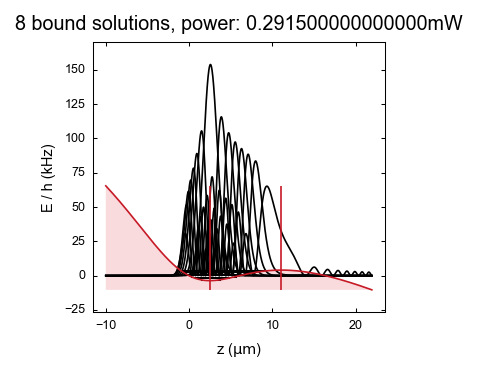

In [31]:
trap[trap.power_tweezer] = 1* initial_power
trap[trap.grad_z] = 1*initial_grad
plot_solutions(trap,100,-1*zr,2.2*zr)

  0%|          | 0/50 [00:00<?, ?it/s]

<lambdifygenerated-1563>:2: RuntimeWarning: overflow encountered in scalar power
  return 9.25429819739509e-40*z/(pi**2*(z**2/pi**2 + 1.00808875956951e-11)**2) - 3.01926539188606e-24
<lambdifygenerated-1564>:2: RuntimeWarning: overflow encountered in scalar power
  return -3.70171927895804e-39*z**2/(pi**4*(z**2/pi**2 + 1.00808875956951e-11)**3) + 9.25429819739509e-40/(pi**2*(z**2/pi**2 + 1.00808875956951e-11)**2)
100%|██████████| 50/50 [01:42<00:00,  2.05s/it]


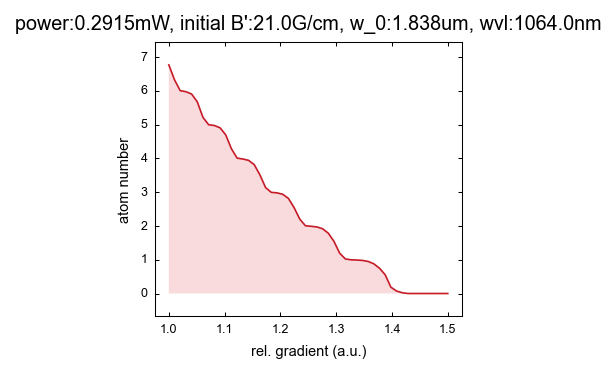

In [32]:
trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = initial_grad
plot_occupation_grad(trap,100,-1.5*zr,2.2*zr,grad_fac_down=1,grad_fac_up=1.5,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=25*si.ms)

  0%|          | 0/50 [00:00<?, ?it/s]

<lambdifygenerated-1963>:2: RuntimeWarning: overflow encountered in scalar power
  return 9.25429819739509e-40*z/(pi**2*(z**2/pi**2 + 1.00808875956951e-11)**2) - 3.01926539188606e-24
<lambdifygenerated-1964>:2: RuntimeWarning: overflow encountered in scalar power
  return -3.70171927895804e-39*z**2/(pi**4*(z**2/pi**2 + 1.00808875956951e-11)**3) + 9.25429819739509e-40/(pi**2*(z**2/pi**2 + 1.00808875956951e-11)**2)
100%|██████████| 50/50 [01:40<00:00,  2.01s/it]


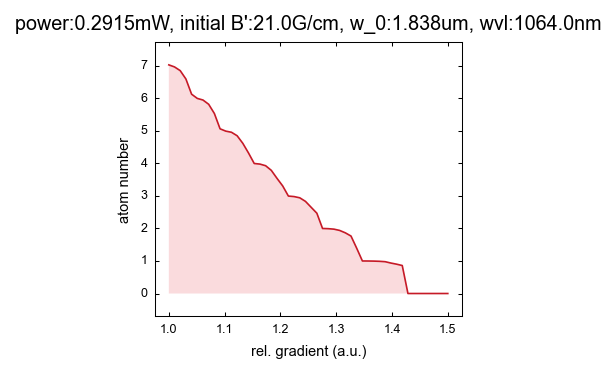

In [34]:
trap[trap.power_tweezer] = initial_power
trap[trap.grad_z] = initial_grad
plot_occupation_grad(trap,100,-1.5*zr,2.2*zr,grad_fac_down=1,grad_fac_up=1.5,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=1*si.ms)